In [2]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

In [3]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1
w = !apt install tree
print(w[-2])

Setting up tree (2.0.2-1) ...


In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

# 파이토치 관련 라이브러리

import torch
from torch import nn, optim
from torchinfo import summary
from torchviz import make_dot
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [2]:
# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
# 공통 함수 다운로드
!git clone https://github.com/wikibook/pythonlibs.git

# # 공통 함수 불러오기
from pythonlibs.torch_lib1 import *


# # 공통 함수 확인
print(README)

Cloning into 'pythonlibs'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 25 (delta 6), reused 25 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 21.10 MiB | 12.65 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Common Library for PyTorch
Author: M. Akaishi


In [4]:
import os
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
# 데이터 다운로드
w = !wget -nc https://download.pytorch.org/tutorial/hymenoptera_data.zip

# 결과 확인
print(w[-2])

2025-03-13 01:01:59 (67.0 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]


In [6]:
# 압축 해제
w = !unzip -o hymenoptera_data.zip

# 결과 확인
print(w[-1])

  inflating: hymenoptera_data/val/bees/abeja.jpg  


In [7]:
data_dir = 'hymenoptera_data'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'val')

print(train_dir)

hymenoptera_data/train


In [8]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(0.5)
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [10]:
train_data = datasets.ImageFolder(
    train_dir,
    transform = train_transform
)

train_data2 = datasets.ImageFolder(
    train_dir,
    train_transform
)

test_data = datasets.ImageFolder(
    test_dir,
    transform = test_transform
)

In [12]:
img, label = test_data[0]
print(img.shape)
print(label)

torch.Size([3, 224, 224])
0


In [14]:
classes = ['ants', 'bees']

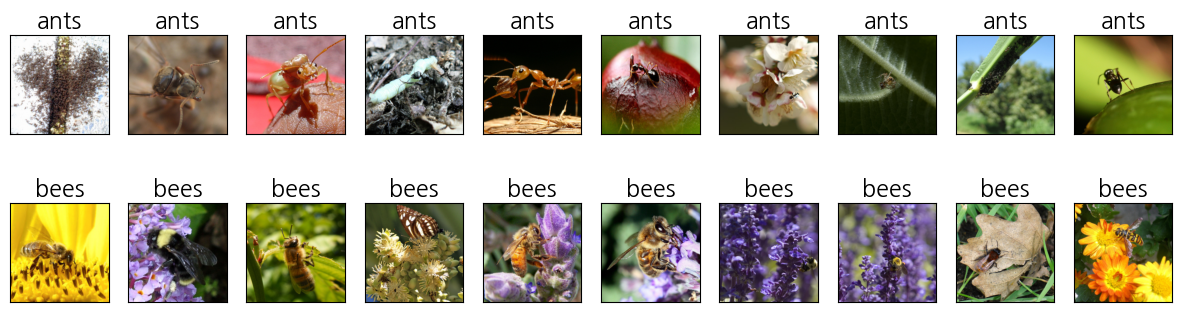

In [15]:
# 검증 데이터
# 처음 10개와 마지막 10개 이미지 출력

plt.figure(figsize=(15, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    image, label = test_data[i]
    img = (np.transpose(image.numpy(), (1, 2, 0)) + 1)/2
    plt.imshow(img)
    ax.set_title(classes[label])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 10, i + 11)
    image, label = test_data[-i-1]
    img = (np.transpose(image.numpy(), (1, 2, 0)) + 1)/2
    plt.imshow(img)
    ax.set_title(classes[label])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [17]:
batch_size = 50

train_loader = DataLoader(
    train_data,
    batch_size,
    True
)

test_loader = DataLoader(
    test_data,
    batch_size,
    False
)

train_loader2 = DataLoader(
    train_data2,
    batch_size,
    True
)

test_loader2 = DataLoader(
    test_data,
    batch_size,
    True
)

In [18]:
show_images_labels(test_loader2, classes, None, None)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
## Transfor learning, freezing

In [21]:
weight = models.VGG19_BN_Weights.IMAGENET1K_V1
net = models.vgg19_bn(weights=weight)

print(net)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:02<00:00, 222MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [22]:
## parameter freezing
for param in net.parameters():
  param.requires_grad = False

In [24]:
pp = list(net.parameters())[2]
print(pp.requires_grad)

False


In [25]:
in_features = net.classifier[6].in_features
n_output = 2

net.classifier[6] = nn.Linear(in_features, n_output)

print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [26]:
net = net.to(device)
lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
criterion = nn.CrossEntropyLoss()

num_epochs = 5
history = np.zeros((0, 5))

In [27]:
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [1/5], loss: 0.01408 acc: 0.56557 val_loss: 0.01203, val_acc: 0.91503


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [2/5], loss: 0.01027 acc: 0.79098 val_loss: 0.00650, val_acc: 0.96732


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [3/5], loss: 0.00678 acc: 0.90574 val_loss: 0.00421, val_acc: 0.97386


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [4/5], loss: 0.00546 acc: 0.93033 val_loss: 0.00312, val_acc: 0.96732


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [5/5], loss: 0.00523 acc: 0.89344 val_loss: 0.00270, val_acc: 0.96732


In [28]:
show_images_labels(test_loader2, classes, net, device)

Output hidden; open in https://colab.research.google.com to view.

In [29]:
weight = models.VGG19_BN_Weights.IMAGENET1K_V1
net = models.vgg19_bn(weights=weight)

print(weight.transforms())

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [43]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [5]:
from typing import Optional

class Bottleneck(nn.Module):
  expansion = 4 # output channel expansion
  def __init__(self, inplanes:int, planes:int, stride:int=1,
               downsample:Optional[nn.Module] = None, groups:int=1,
               base_width:int=64, dilation:int=1,
               norm_layer:Optional[nn.Module]=None):
    super().__init__()
    if norm_layer is None:
      norm_layer = nn.BatchNorm2d

    width = int(planes * (base_width / 64.))

    ## First Conv : 1x1 Conv
    self.conv1 = nn.Conv2d(inplanes, width, kernel_size=1, stride=1, bias=False)
    self.bn1 = norm_layer(width)

    ## Second Conv :3x3 Conv
    self.conv2 = nn.Conv2d(width, width, kernel_size=3, stride=stride,
                           padding=dilation, groups=groups, dilation=dilation, bias=False)
    self.bn2 = norm_layer(width)

    self.conv3 = nn.Conv2d(width, planes*self.expansion, kernel_size=1, stride=1, bias=False)
    self.bn3 = norm_layer(planes*self.expansion)

    ## Third Conv : 1x1 Conv
    self.downsample = downsample
    self.stride = stride
    self.relu = nn.ReLU(inplace=True)

  def forward(self, x):
    identity = x

    ## first layer
    out = self.conv1(x)
    out = self.bn1(out)
    out = self.relu(out)

    ## second layer
    out = self.conv2(out)
    out = self.bn2(out)
    out = self.relu(out)

    ## third layer
    out = self.conv3(out)
    out = self.bn3(out)

    if self.downsample is not None:
      identity = self.downsample(x)

    out += identity
    out = self.relu(out)

    return out

In [6]:
bottleneck = Bottleneck(256, 64)
print(bottleneck)

Bottleneck(
  (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)


In [7]:
from typing import Optional

In [39]:
##
from typing import Type, List, Optional

class BasicBlock(nn.Module):
  expansion = 1

  def __init__(self, inplanes:int, planes:int, stride:int=1,
               downsample:Optional[nn.Module]=None, groups:int=1,
               dilation:int=1, norm_layer:Optional[nn.Module]=None):
    super().__init__()

    ## Normalization layer: Skip connection
    if norm_layer is None:
      norm_layer = nn.BatchNorm2d

    ## First Convolutional layer
    self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride=stride,
                           padding=dilation, groups=groups, bias=False, dilation=dilation)
    self.bn1 = norm_layer(planes)

    ## Second Convolutional layer
    self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1,
                           padding=dilation, groups=groups, bias=False, dilation=dilation)
    self.bn2 = norm_layer(planes)

    ##
    self.relu = nn.ReLU(inplace=True)
    self.downsample = downsample
    self.stride = stride

  def forward(self, x):
    identity = x

    out = self.conv1(x)
    out = self.bn1(out)
    out = self.relu(out)

    out = self.conv2(out)
    out = self.bn2(out)

    if self.downsample is not None:
      identity = self.downsample(x)

    out += identity
    out = self.relu(out)

    return out

##
class Resnet18(nn.Module):
  def __init__(self, block: Type[nn.Module], layers: List[int], num_classes: int = 1000,
                 groups: int = 1, width_per_group: int = 64,
                 norm_layer: Optional[nn.Module] = None):
    super().__init__()

    ## Default BatchNorm2d
    if norm_layer is None:
      norm_layer = nn.BatchNorm2d
    self._norm_layer = norm_layer

    ## initial parameter
    self.inplanes = 64
    self.dilation = 1
    self.groups = groups
    self.base_width = width_per_group

    ## Initial conv layers (7 x 7)
    self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
    self.bn1 = norm_layer(self.inplanes)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    ## Resnet layer from BasicBlock
    self.layer1 = self._make_layer(block, 64, layers[0]) # layers[0] = 2 in resnet18
    self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
    self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
    self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

    ## Fully connected layer
    self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    self.fc = nn.Linear(512*block.expansion, num_classes)

    ## initial parameters
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
      elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)

  def _make_layer(self, block:Type[nn.Module], planes:int, blocks:int, stride:int=1):
    downsample = None

    if stride != 1 or self.inplanes != planes*block.expansion:
      downsample = nn.Sequential(
          nn.Conv2d(self.inplanes, planes*block.expansion, kernel_size=1,
                    stride=stride, bias=False),
          self._norm_layer(planes*block.expansion)
      )
      # def __init__(self, block: Type[nn.Module], layers: List[int], num_classes: int = 1000,
      #            groups: int = 1, width_per_group: int = 64,
      #            norm_layer: Optional[nn.Module] = None):
    layers = [block(self.inplanes, planes, stride, downsample,
                    groups=self.groups, dilation=self.dilation, norm_layer=self._norm_layer)]
    self.inplanes = planes*block.expansion
    for _ in range(1, blocks):
      layers.append(block(self.inplanes, planes, groups=self.groups,
                          dilation=self.dilation, norm_layer=self._norm_layer))

    return nn.Sequential(*layers)

  def forward(self, x:torch.Tensor):
    ## initial layers
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.maxpool(x)

    ## Resnet layers
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)

    ## Fully connected layers
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    x = self.fc(x)

    return x

In [40]:
# def __init__(self, block:Type[nn.Module], layers:List[int],
#                num_classes:int=1000, groups:int=1, width_per_group:int=64,
#                norm_layer:Optional[nn.Module]=None):

def resnet18(num_classes:int=1000, norm_layer:Optional[nn.Module]=None):
  return Resnet18(block=BasicBlock,
                  layers=[2, 2, 2, 2],
                  num_classes=num_classes,
                  norm_layer=norm_layer
  )

In [41]:
net = resnet18(num_classes=10)

print(net)

Resnet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, ker

In [42]:
net = net.to(device)
summary(net,(100, 3, 112, 112))

Layer (type:depth-idx)                   Output Shape              Param #
Resnet18                                 [100, 10]                 --
├─Conv2d: 1-1                            [100, 64, 56, 56]         9,408
├─BatchNorm2d: 1-2                       [100, 64, 56, 56]         128
├─ReLU: 1-3                              [100, 64, 56, 56]         --
├─MaxPool2d: 1-4                         [100, 64, 28, 28]         --
├─Sequential: 1-5                        [100, 64, 28, 28]         --
│    └─BasicBlock: 2-1                   [100, 64, 28, 28]         --
│    │    └─Conv2d: 3-1                  [100, 64, 28, 28]         36,864
│    │    └─BatchNorm2d: 3-2             [100, 64, 28, 28]         128
│    │    └─ReLU: 3-3                    [100, 64, 28, 28]         --
│    │    └─Conv2d: 3-4                  [100, 64, 28, 28]         36,864
│    │    └─BatchNorm2d: 3-5             [100, 64, 28, 28]         128
│    │    └─ReLU: 3-6                    [100, 64, 28, 28]         --
│

In [43]:
# 분류 클래스명 정의

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 분류 클래스 수는 10
n_output = len(classes)

In [47]:
transform_train = transforms.Compose([
    transforms.Resize(112),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

transform_test = transforms.Compose([
    transforms.Resize(112),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [50]:
data_root = './data'
train_set = datasets.CIFAR10(
    data_root,
    True,
    download = True,
    transform=transform_train
)

test_set = datasets.CIFAR10(
    data_root,
    False,
    download = True,
    transform=transform_test
)

Files already downloaded and verified
Files already downloaded and verified


In [51]:
##
batch_size = 50

train_loader = DataLoader(
    train_set,
    batch_size,
    True
)

test_loader = DataLoader(
    test_set,
    batch_size,
    False
)

In [52]:
##
lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
criterion = nn.CrossEntropyLoss()

num_epochs=10
history = np.zeros((0, 5))

In [53]:
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.03345 acc: 0.38146 val_loss: 0.02783, val_acc: 0.48260


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.02598 acc: 0.52778 val_loss: 0.02325, val_acc: 0.57640


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.02261 acc: 0.59640 val_loss: 0.02101, val_acc: 0.62160


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.02020 acc: 0.63994 val_loss: 0.01968, val_acc: 0.64520


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.01849 acc: 0.67264 val_loss: 0.01805, val_acc: 0.68060


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.01700 acc: 0.69836 val_loss: 0.01697, val_acc: 0.70170


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.01577 acc: 0.72228 val_loss: 0.01561, val_acc: 0.72870


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.01466 acc: 0.74422 val_loss: 0.01501, val_acc: 0.73900


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.01363 acc: 0.76230 val_loss: 0.01450, val_acc: 0.74400


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.01281 acc: 0.77596 val_loss: 0.01369, val_acc: 0.76130


초기상태 : 손실 : 0.02783  정확도 : 0.48260
최종상태 : 손실 : 0.01369 정확도 : 0.76130


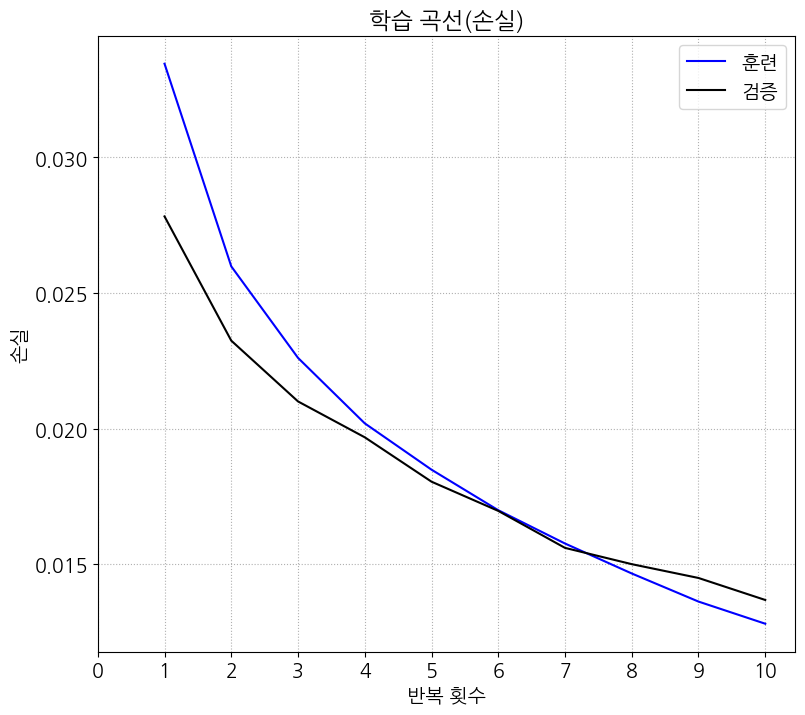

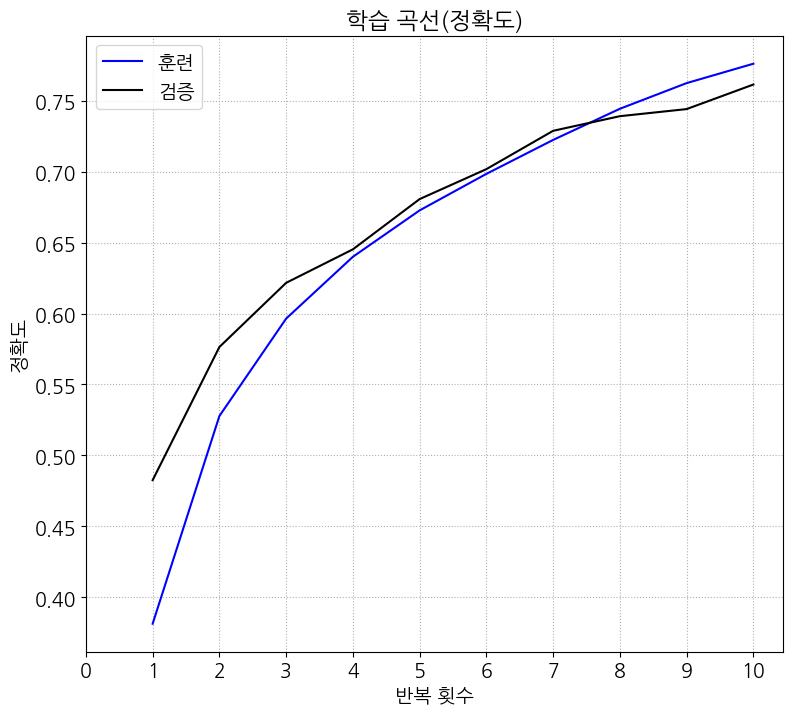

In [54]:
evaluate_history(history)

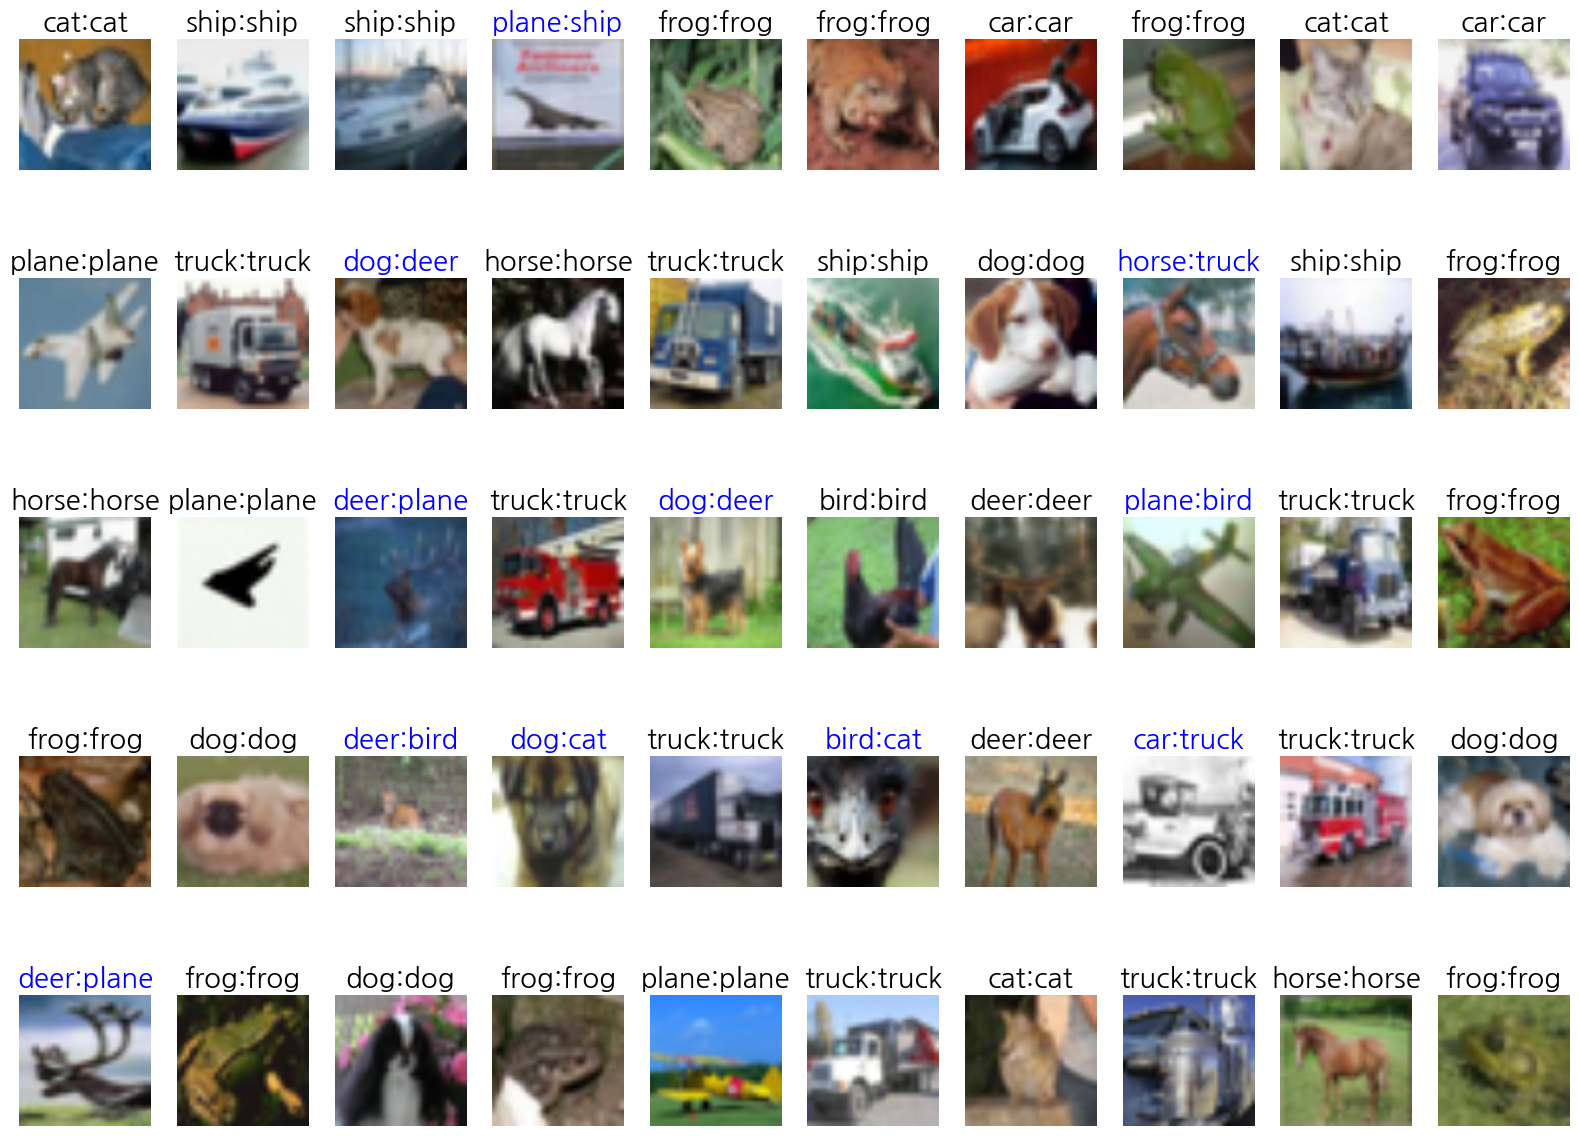

In [55]:
show_images_labels(test_loader, classes, net, device)